 <img src="escudo.jpg" width="170" align="right" >
 
# PROYECTO FINAL PDS 
## Semestre 2023-2
## Noemi Alean Acuña
## Ricardo Cuesta
 

In [1]:
import numpy as np             
import matplotlib.pyplot as plt
import scipy.signal as signal

### FILTROS FIR POR METODO DE ENVENTANADO CON 4 TIPO DE VENTANAS

Los filtros FIR son estables puesto que sólo tienen polos, es decir, elementos en el numerador en su función de transferencia. También tienen la ventaja que pueden diseñarse para ser de fase lineal, es decir, no introducen desfases en la señal, a diferencia de los IIR o los filtros analógicos. Por ese motivo tienen interés en audio.

In [2]:
def ventana(name='rect', N=20):
    
    if name == 'rect':
        ventana = np.ones(N)
    elif name == 'hamming':
        ventana = np.array([0.54 - 0.46 * np.cos(2 * np.pi * n / (N - 1)) for n in range(N)])
    elif name == 'hanning':
        ventana = np.array([0.5 - 0.5 * np.cos(2 * np.pi * n / (N - 1)) for n in range(N)])
    elif name == 'black':
        ventana = np.array([0.42-0.5*np.cos((2*np.pi*n)/(N-1))+0.08*np.cos((4*np.pi*n)/(N-1))for n in range(N)])
    return ventana 

In [3]:
#filtro pasabajas 

fc=1200.0
fs=8000.0 # frec de muestreo
Adb=0 # Ganancia del filtro en decibeles
N = 512 # Numero de puntos de la FFT
BW=500 # Ancho de banda en la banda de tansicion

wc = 2*np.pi*fc/fs # frecuencia de corte normalizada en radianes

bwn=2*np.pi*BW/fs # ancho de banda  normalizado en radianes

M=int(4/bwn) # orden estimado del filtro
print('Orden del filtro: ', M)

n = np.arange(-M,M)
## Diseño del filtro

h1 = wc/np.pi * np.sinc(wc*(n)/np.pi) # Respuesta del filtro ideal
h1[n==0]=wc/np.pi

w1,Hh1 = signal.freqz(h1,1,whole=True, worN=N) # Respuesta en frecuencia del filtro ideal

winr= ventana(name='rect', N=len(n)) # funcion ventana rect

h2r=h1*winr # Multiplico la respuesta ideal por la ventana

A=np.sqrt(10**(0.1*Adb))
h2r=h2r*A # Ganancia del filtro
w2r,Hh2r = signal.freqz(h2r,1,whole=True, worN=N) # Respuesta en frecuencia del filtro enventanado

frec1r=(w1-np.pi)*fs/(2*np.pi) #vector frecuencias
xf1r=np.abs(np.fft.fftshift(Hh1))#vector transformada
frec2r=(w2r-np.pi)*fs/(2*np.pi) #vector frecuencias del filtro enventanado
xf2r=np.abs(np.fft.fftshift(Hh2r)) #vector transformada del filtro enventanado

M=int(8*np.pi/bwn) # orden estimado del filtro ventana Hamming
print('Orden del filtro: ', M)

winh= ventana(name='hamming', N=len(n)) # funcion ventana hamming

h2h=h1*winh # Multiplico la respuesta ideal por la ventana

A=np.sqrt(10**(0.1*Adb))
h2h=h2h*A # Ganancia del filtro
w2h,Hh2h = signal.freqz(h2h,1,whole=True, worN=N) # Respuesta en frecuencia del filtro enventanado

frec1h=(w1-np.pi)*fs/(2*np.pi) #vector frecuencias
xf1h=np.abs(np.fft.fftshift(Hh1))#vector transformada
frec2h=(w2h-np.pi)*fs/(2*np.pi) #vector frecuencias del filtro enventanado
xf2h=np.abs(np.fft.fftshift(Hh2h)) #vector transformada del filtro enventanado


M=int(8*np.pi/bwn) # orden estimado del filtro ventana Hanning
print('Orden del filtro: ', M)

winn= ventana(name='hanning', N=len(n)) # funcion ventana Hanning

h2n=h1*winn # Multiplico la respuesta ideal por la ventana

A=np.sqrt(10**(0.1*Adb))
h2n=h2n*A # Ganancia del filtro
w2n,Hh2n = signal.freqz(h2n,1,whole=True, worN=N) # Respuesta en frecuencia del filtro enventanado

frec1n=(w1-np.pi)*fs/(2*np.pi) #vector frecuencias
xf1n=np.abs(np.fft.fftshift(Hh1))#vector transformada
frec2n=(w2n-np.pi)*fs/(2*np.pi) #vector frecuencias del filtro enventanado
xf2n=np.abs(np.fft.fftshift(Hh2n)) #vector transformada del filtro enventanado


M=int(12*np.pi/bwn) # orden estimado del filtro ventana Blackman
print('Orden del filtro: ', M)

winbk= ventana(name='black', N=len(n)) # funcion ventana Blackman

h2bk=h1*winbk # Multiplico la respuesta ideal por la ventana

A=np.sqrt(10**(0.1*Adb))
h2bk=h2bk*A # Ganancia del filtro
w2bk,Hh2bk = signal.freqz(h2bk,1,whole=True, worN=N) # Respuesta en frecuencia del filtro enventanado

frec1bk=(w1-np.pi)*fs/(2*np.pi) #vector frecuencias
xf1bk=np.abs(np.fft.fftshift(Hh1))#vector transformada
frec2bk=(w2bk-np.pi)*fs/(2*np.pi) #vector frecuencias del filtro enventanado
xf2bk=np.abs(np.fft.fftshift(Hh2bk)) #vector transformada del filtro enventanado

Orden del filtro:  10
Orden del filtro:  64
Orden del filtro:  64
Orden del filtro:  96


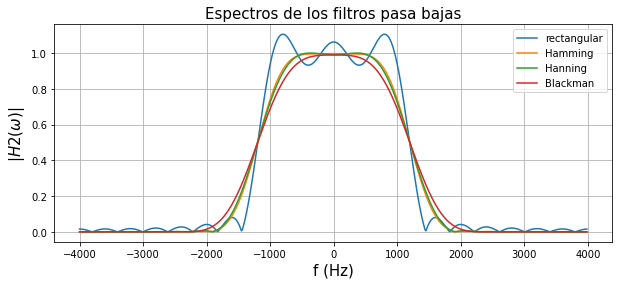

In [4]:
plt.figure(figsize=(10,4))
plt.plot(frec2r, xf2r, label ="rectangular")
plt.plot(frec2h, xf2h, label ="Hamming")
plt.plot(frec2n, xf2n, label ="Hanning")
plt.plot(frec2bk, xf2bk, label ="Blackman")
plt.title('Espectros de los filtros pasa bajas',fontsize=15)
#plt.xlim(900,1100)
plt.xlabel('f (Hz)',fontsize=15)
plt.ylabel('$|H2(\omega)|$',fontsize=15)
plt.legend()
plt.grid()

In [5]:
# Filtro pasa altos
fc = 1200.0
fs = 8000.0  # Frecuencia de muestreo
Adb = 0  # Ganancia del filtro en decibeles
N = 512  # Numero de puntos de la FFT
BW = 500  # Ancho de banda en la banda de transición

wc = 2 * np.pi * fc / fs  # Frecuencia de corte normalizada en radianes

bwn = 2 * np.pi * BW / fs  # Ancho de banda normalizado en radianes

M = int(4 / bwn)  # Orden estimado del filtro
print('Orden del filtro: ', M)

n = np.arange(-M, M)
# Diseño del filtro
h1 = np.sinc(wc * (n) / np.pi)  # Respuesta del filtro ideal
h1[n == 0] = 1 - wc / np.pi  # Corrección del valor central

w1, Hh1 = signal.freqz(h1, 1, whole=True, worN=N)  # Respuesta en frecuencia del filtro ideal

winr = ventana(name='rect', N=len(n))  # Función ventana rectangular

h2r = h1 * winr  # Multiplico la respuesta ideal por la ventana

A = np.sqrt(10 ** (0.1 * Adb))
h2r = h2r * A  # Ganancia del filtro
w2r, Hh2r = signal.freqz(h2r, 1, whole=True, worN=N)  # Respuesta en frecuencia del filtro enventanado

frec1r = (w1 - np.pi) * fs / (2 * np.pi)  # Vector frecuencias
xf1r = np.abs(np.fft.fftshift(Hh1))  # Vector transformada
frec2r = (w2r - np.pi) * fs / (2 * np.pi)  # Vector frecuencias del filtro enventanado
xf2r = np.abs(np.fft.fftshift(Hh2r))  # Vector transformada del filtro enventanado

M=int(8*np.pi/bwn) # orden estimado del filtro ventana Hamming
print('Orden del filtro: ', M)

winh= ventana(name='hamming', N=len(n)) # funcion ventana hamming

h2h=h1*winh # Multiplico la respuesta ideal por la ventana

A=np.sqrt(10**(0.1*Adb))
h2h=h2h*A # Ganancia del filtro
w2h,Hh2h = signal.freqz(h2h,1,whole=True, worN=N) # Respuesta en frecuencia del filtro enventanado

frec1h=(w1-np.pi)*fs/(2*np.pi) #vector frecuencias
xf1h=np.abs(np.fft.fftshift(Hh1))#vector transformada
frec2h=(w2h-np.pi)*fs/(2*np.pi) #vector frecuencias del filtro enventanado
xf2h=np.abs(np.fft.fftshift(Hh2h)) #vector transformada del filtro enventanado


M=int(8*np.pi/bwn) # orden estimado del filtro ventana Hanning
print('Orden del filtro: ', M)

winn= ventana(name='hanning', N=len(n)) # funcion ventana Hanning

h2n=h1*winn # Multiplico la respuesta ideal por la ventana

A=np.sqrt(10**(0.1*Adb))
h2n=h2n*A # Ganancia del filtro
w2n,Hh2n = signal.freqz(h2n,1,whole=True, worN=N) # Respuesta en frecuencia del filtro enventanado

frec1n=(w1-np.pi)*fs/(2*np.pi) #vector frecuencias
xf1n=np.abs(np.fft.fftshift(Hh1))#vector transformada
frec2n=(w2n-np.pi)*fs/(2*np.pi) #vector frecuencias del filtro enventanado
xf2n=np.abs(np.fft.fftshift(Hh2n)) #vector transformada del filtro enventanado


M=int(12*np.pi/bwn) # orden estimado del filtro ventana Blackman
print('Orden del filtro: ', M)

winbk= ventana(name='black', N=len(n)) # funcion ventana Blackman

h2bk=h1*winbk # Multiplico la respuesta ideal por la ventana

A=np.sqrt(10**(0.1*Adb))
h2bk=h2bk*A # Ganancia del filtro
w2bk,Hh2bk = signal.freqz(h2bk,1,whole=True, worN=N) # Respuesta en frecuencia del filtro enventanado

frec1bk=(w1-np.pi)*fs/(2*np.pi) #vector frecuencias
xf1bk=np.abs(np.fft.fftshift(Hh1))#vector transformada
frec2bk=(w2bk-np.pi)*fs/(2*np.pi) #vector frecuencias del filtro enventanado
xf2bk=np.abs(np.fft.fftshift(Hh2bk)) #vector transformada del filtro enventanado


Orden del filtro:  10
Orden del filtro:  64
Orden del filtro:  64
Orden del filtro:  96


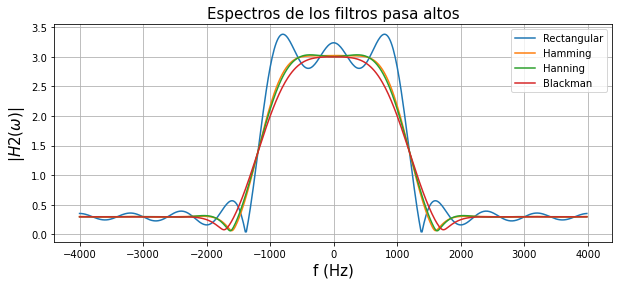

In [6]:
# Repetir el proceso para otras ventanas (Hamming, Hanning, Blackman)
# ...

# Graficar los espectros de frecuencia de los filtros con diferentes ventanas
plt.figure(figsize=(10, 4))
plt.plot(frec2r, xf2r, label="Rectangular")
plt.plot(frec2h, xf2h, label="Hamming")
plt.plot(frec2n, xf2n, label="Hanning")
plt.plot(frec2bk, xf2bk, label="Blackman")
plt.title('Espectros de los filtros pasa altos', fontsize=15)
plt.xlabel('f (Hz)', fontsize=15)
plt.ylabel('$|H2(\omega)|$', fontsize=15)
plt.legend()
plt.grid()
plt.show()

In [7]:
# Filtro pasa banda
f_low = 1000.0
f_high = 2000.0
fs = 8000.0  # Frecuencia de muestreo
Adb = 0  # Ganancia del filtro en decibeles
N = 512  # Numero de puntos de la FFT
BW = 500  # Ancho de banda en la banda de transición

wc_low = 2 * np.pi * f_low / fs
wc_high = 2 * np.pi * f_high / fs
bwn = 2 * np.pi * BW / fs

M = int(4 / bwn)  # Orden estimado del filtro
print('Orden del filtro: ', M)

n = np.arange(-M, M)

# Diseño del filtro pasa banda
h1 = np.sin(wc_high * n) / (np.pi * n) - np.sin(wc_low * n) / (np.pi * n)
h1[n == 0] = (wc_high - wc_low) / np.pi

w1, Hh1 = signal.freqz(h1, 1, whole=True, worN=N)  # Respuesta en frecuencia del filtro ideal

winr = ventana(name='rect', N=len(n))  # Función ventana rectangular

h2r = h1 * winr  # Multiplico la respuesta ideal por la ventana

A = np.sqrt(10 ** (0.1 * Adb))
h2r = h2r * A  # Ganancia del filtro
w2r, Hh2r = signal.freqz(h2r, 1, whole=True, worN=N)  # Respuesta en frecuencia del filtro enventanado

frec1r = (w1 - np.pi) * fs / (2 * np.pi)  # Vector frecuencias
xf1r = np.abs(np.fft.fftshift(Hh1))  # Vector transformada
frec2r = (w2r - np.pi) * fs / (2 * np.pi)  # Vector frecuencias del filtro enventanado
xf2r = np.abs(np.fft.fftshift(Hh2r))  # Vector transformada del filtro enventanado

M=int(8*np.pi/bwn) # orden estimado del filtro ventana Hamming
print('Orden del filtro: ', M)

winh= ventana(name='hamming', N=len(n)) # funcion ventana hamming

h2h=h1*winh # Multiplico la respuesta ideal por la ventana

A=np.sqrt(10**(0.1*Adb))
h2h=h2h*A # Ganancia del filtro
w2h,Hh2h = signal.freqz(h2h,1,whole=True, worN=N) # Respuesta en frecuencia del filtro enventanado

frec1h=(w1-np.pi)*fs/(2*np.pi) #vector frecuencias
xf1h=np.abs(np.fft.fftshift(Hh1))#vector transformada
frec2h=(w2h-np.pi)*fs/(2*np.pi) #vector frecuencias del filtro enventanado
xf2h=np.abs(np.fft.fftshift(Hh2h)) #vector transformada del filtro enventanado


M=int(8*np.pi/bwn) # orden estimado del filtro ventana Hanning
print('Orden del filtro: ', M)

winn= ventana(name='hanning', N=len(n)) # funcion ventana Hanning

h2n=h1*winn # Multiplico la respuesta ideal por la ventana

A=np.sqrt(10**(0.1*Adb))
h2n=h2n*A # Ganancia del filtro
w2n,Hh2n = signal.freqz(h2n,1,whole=True, worN=N) # Respuesta en frecuencia del filtro enventanado

frec1n=(w1-np.pi)*fs/(2*np.pi) #vector frecuencias
xf1n=np.abs(np.fft.fftshift(Hh1))#vector transformada
frec2n=(w2n-np.pi)*fs/(2*np.pi) #vector frecuencias del filtro enventanado
xf2n=np.abs(np.fft.fftshift(Hh2n)) #vector transformada del filtro enventanado


M=int(12*np.pi/bwn) # orden estimado del filtro ventana Blackman
print('Orden del filtro: ', M)

winbk= ventana(name='black', N=len(n)) # funcion ventana Blackman

h2bk=h1*winbk # Multiplico la respuesta ideal por la ventana

A=np.sqrt(10**(0.1*Adb))
h2bk=h2bk*A # Ganancia del filtro
w2bk,Hh2bk = signal.freqz(h2bk,1,whole=True, worN=N) # Respuesta en frecuencia del filtro enventanado

frec1bk=(w1-np.pi)*fs/(2*np.pi) #vector frecuencias
xf1bk=np.abs(np.fft.fftshift(Hh1))#vector transformada
frec2bk=(w2bk-np.pi)*fs/(2*np.pi) #vector frecuencias del filtro enventanado
xf2bk=np.abs(np.fft.fftshift(Hh2bk)) #vector transformada del filtro enventanado


Orden del filtro:  10
Orden del filtro:  64
Orden del filtro:  64
Orden del filtro:  96


C:\Users\HP\AppData\Local\Temp\ipykernel_15640\1403752328.py:19: RuntimeWarning: invalid value encountered in true_divide
  h1 = np.sin(wc_high * n) / (np.pi * n) - np.sin(wc_low * n) / (np.pi * n)


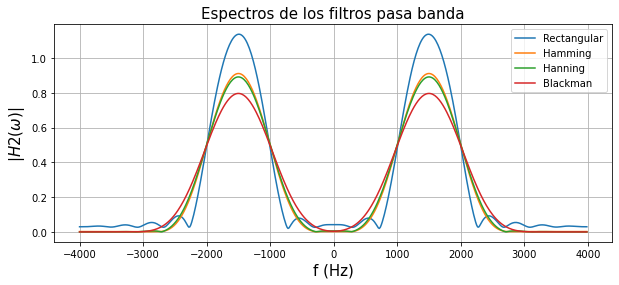

In [8]:
# Graficar los espectros de frecuencia de los filtros con diferentes ventanas
plt.figure(figsize=(10, 4))
plt.plot(frec2r, xf2r, label="Rectangular")
plt.plot(frec2h, xf2h, label="Hamming")
plt.plot(frec2n, xf2n, label="Hanning")
plt.plot(frec2bk, xf2bk, label="Blackman")
plt.title('Espectros de los filtros pasa banda', fontsize=15)
plt.xlabel('f (Hz)', fontsize=15)
plt.ylabel('$|H2(\omega)|$', fontsize=15)
plt.legend()
plt.grid()
plt.show()

Orden del filtro:  10
Orden del filtro:  64
Orden del filtro:  64
Orden del filtro:  96


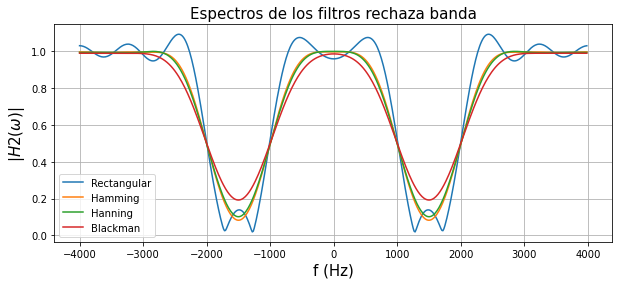

In [9]:
# Filtro rechaza banda
f_low = 1000.0
f_high = 2000.0
fs = 8000.0  # Frecuencia de muestreo
Adb = 0  # Ganancia del filtro en decibeles
N = 512  # Numero de puntos de la FFT
BW = 500  # Ancho de banda en la banda de transición

wc_low = 2 * np.pi * f_low / fs
wc_high = 2 * np.pi * f_high / fs
bwn = 2 * np.pi * BW / fs

M = int(4 / bwn)  # Orden estimado del filtro
print('Orden del filtro: ', M)

n = np.arange(-M, M)

# Diseño del filtro rechaza banda
h1 = np.sinc(n) - (wc_high / np.pi) * np.sinc(wc_high * n / np.pi) + (wc_low / np.pi) * np.sinc(wc_low * n / np.pi)
h1[n == 0] = 1 - (wc_high - wc_low) / np.pi

w1, Hh1 = signal.freqz(h1, 1, whole=True, worN=N)  # Respuesta en frecuencia del filtro ideal

winr = ventana(name='rect', N=len(n))  # Función ventana rectangular

h2r = h1 * winr  # Multiplico la respuesta ideal por la ventana

A = np.sqrt(10 ** (0.1 * Adb))
h2r = h2r * A  # Ganancia del filtro
w2r, Hh2r = signal.freqz(h2r, 1, whole=True, worN=N)  # Respuesta en frecuencia del filtro enventanado

frec1r = (w1 - np.pi) * fs / (2 * np.pi)  # Vector frecuencias
xf1r = np.abs(np.fft.fftshift(Hh1))  # Vector transformada
frec2r = (w2r - np.pi) * fs / (2 * np.pi)  # Vector frecuencias del filtro enventanado
xf2r = np.abs(np.fft.fftshift(Hh2r))  # Vector transformada del filtro enventanado

M=int(8*np.pi/bwn) # orden estimado del filtro ventana Hamming
print('Orden del filtro: ', M)

winh= ventana(name='hamming', N=len(n)) # funcion ventana hamming

h2h=h1*winh # Multiplico la respuesta ideal por la ventana

A=np.sqrt(10**(0.1*Adb))
h2h=h2h*A # Ganancia del filtro
w2h,Hh2h = signal.freqz(h2h,1,whole=True, worN=N) # Respuesta en frecuencia del filtro enventanado

frec1h=(w1-np.pi)*fs/(2*np.pi) #vector frecuencias
xf1h=np.abs(np.fft.fftshift(Hh1))#vector transformada
frec2h=(w2h-np.pi)*fs/(2*np.pi) #vector frecuencias del filtro enventanado
xf2h=np.abs(np.fft.fftshift(Hh2h)) #vector transformada del filtro enventanado


M=int(8*np.pi/bwn) # orden estimado del filtro ventana Hanning
print('Orden del filtro: ', M)

winn= ventana(name='hanning', N=len(n)) # funcion ventana Hanning

h2n=h1*winn # Multiplico la respuesta ideal por la ventana

A=np.sqrt(10**(0.1*Adb))
h2n=h2n*A # Ganancia del filtro
w2n,Hh2n = signal.freqz(h2n,1,whole=True, worN=N) # Respuesta en frecuencia del filtro enventanado

frec1n=(w1-np.pi)*fs/(2*np.pi) #vector frecuencias
xf1n=np.abs(np.fft.fftshift(Hh1))#vector transformada
frec2n=(w2n-np.pi)*fs/(2*np.pi) #vector frecuencias del filtro enventanado
xf2n=np.abs(np.fft.fftshift(Hh2n)) #vector transformada del filtro enventanado


M=int(12*np.pi/bwn) # orden estimado del filtro ventana Blackman
print('Orden del filtro: ', M)

winbk= ventana(name='black', N=len(n)) # funcion ventana Blackman

h2bk=h1*winbk # Multiplico la respuesta ideal por la ventana

A=np.sqrt(10**(0.1*Adb))
h2bk=h2bk*A # Ganancia del filtro
w2bk,Hh2bk = signal.freqz(h2bk,1,whole=True, worN=N) # Respuesta en frecuencia del filtro enventanado

frec1bk=(w1-np.pi)*fs/(2*np.pi) #vector frecuencias
xf1bk=np.abs(np.fft.fftshift(Hh1))#vector transformada
frec2bk=(w2bk-np.pi)*fs/(2*np.pi) #vector frecuencias del filtro enventanado
xf2bk=np.abs(np.fft.fftshift(Hh2bk)) #vector transformada del filtro enventanado

# Graficar los espectros de frecuencia de los filtros con diferentes ventanas
plt.figure(figsize=(10, 4))
plt.plot(frec2r, xf2r, label="Rectangular")
plt.plot(frec2h, xf2h, label="Hamming")
plt.plot(frec2n, xf2n, label="Hanning")
plt.plot(frec2bk, xf2bk, label="Blackman")
plt.title('Espectros de los filtros rechaza banda', fontsize=15)
plt.xlabel('f (Hz)', fontsize=15)
plt.ylabel('$|H2(\omega)|$', fontsize=15)
plt.legend()
plt.grid()
plt.show()

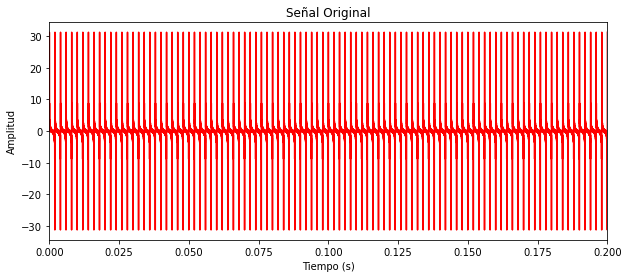

C:\Users\HP\AppData\Local\Temp\ipykernel_15640\2507191444.py:36: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freq, np.abs(Xft), 'r', markerfmt=" ", basefmt="-b")


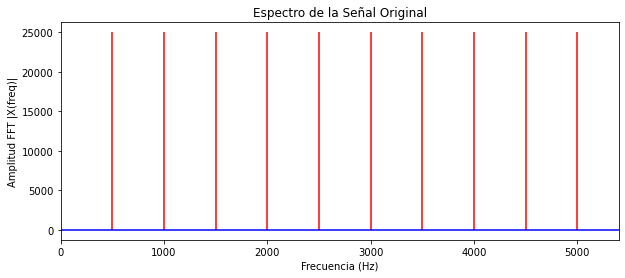

In [11]:
# Señal original
f = 15000
ff = 27000
fs = 50000
freq = 500
fr = 500

ts = 1.0/fs
t = np.arange(0, 1, ts)
x = np.sin(2*np.pi*freq*t)

i = freq
while freq < ff:
    freq = freq + fr
    x = x + np.sin(2*np.pi*freq*t)
    i = i + 1

# Visualización de la señal original
plt.figure(figsize=(10, 4))
plt.plot(t, x, 'r')
plt.title('Señal Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.xlim(0, 0.2)
plt.show()

# Transformada de Fourier de la señal original
Xft = np.fft.fft(x)
N = len(Xft)
n = np.arange(N)
T = N/fs
freq = n/T

# Visualización del espectro de la señal original
plt.figure(figsize=(10, 4))
plt.stem(freq, np.abs(Xft), 'r', markerfmt=" ", basefmt="-b")
plt.xlabel('Frecuencia (Hz)')
plt.title('Espectro de la Señal Original')
plt.ylabel('Amplitud FFT |X(freq)|')
plt.xlim(0, ff/5)
plt.show()



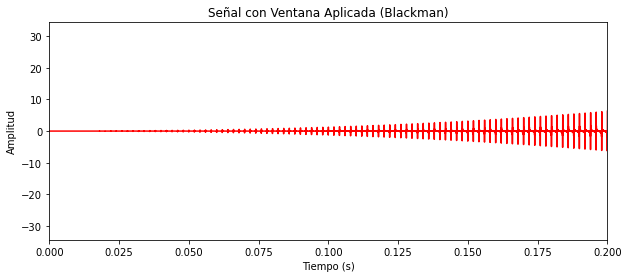

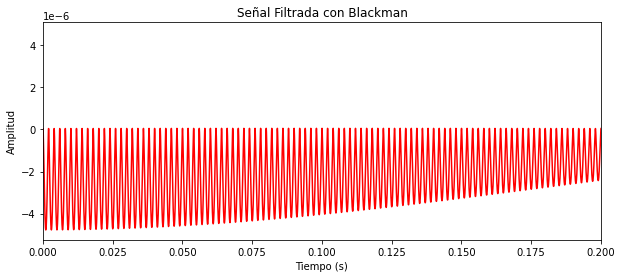

C:\Users\HP\AppData\Local\Temp\ipykernel_15640\1510331151.py:43: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freq, np.abs(Xft_filtrada), 'r', markerfmt=" ", basefmt="-b")


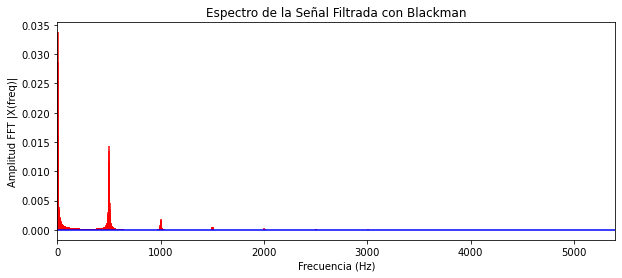

In [24]:
# Aplicar ventana a la señal original
win = ventana(name='black', N=len(x))
x_windowed = x * win

# Visualización de la señal con ventana aplicada
plt.figure(figsize=(10, 4))
plt.plot(t, x_windowed, 'r')
plt.title('Señal con Ventana Aplicada (Blackman)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.xlim(0, 0.2)
plt.show()

# Filtro pasa bajos (ventana de Blackman)
fc = 5000.0  # Frecuencia de corte para el filtro
wc = 2 * np.pi * fc / fs

M = int(4 / (wc / (2 * np.pi)))  # Orden estimado del filtro
h = wc/np.pi * np.sinc(wc*(t)/np.pi)  # Respuesta del filtro ideal
h[t == 0] = wc/np.pi

# Aplicar la ventana al filtro
win_filter = ventana(name='black', N=len(t))
h = h * win_filter

# Aplicar el filtro a la señal
x_filtrada = np.convolve(x_windowed, h, 'same')

# Visualización de la señal filtrada
plt.figure(figsize=(10, 4))
plt.plot(t, x_filtrada, 'r')
plt.title('Señal Filtrada con Blackman')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.xlim(0, 0.2)
plt.show()

# Transformada de Fourier de la señal filtrada
Xft_filtrada = np.fft.fft(x_filtrada)

# Visualización del espectro de la señal filtrada
plt.figure(figsize=(10, 4))
plt.stem(freq, np.abs(Xft_filtrada), 'r', markerfmt=" ", basefmt="-b")
plt.xlabel('Frecuencia (Hz)')
plt.title('Espectro de la Señal Filtrada con Blackman')
plt.ylabel('Amplitud FFT |X(freq)|')
plt.xlim(0, ff/5)
plt.show()